In [73]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from matplotlib.dates import DateFormatter, WeekdayLocator , MonthLocator

In [74]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)  # 禁用換行

inbody_df = pd.read_csv('inbody.csv')


In [75]:
#檢查離奇數值
col_filter = 'Muscle_Mass'
std_range = 3
std_value = inbody_df[col_filter].std()
mean_value = inbody_df[col_filter].mean()
errorData = inbody_df[abs(inbody_df[col_filter] - mean_value) > std_range * std_value]
print(errorData)

inbody_df.loc[errorData.index,col_filter] = None
errorData = inbody_df[abs(inbody_df[col_filter] - mean_value) > std_range * std_value]
print(errorData)


      Date  Weight  Muscle_Mass  Body_Fat  Body_Fat_Percentage   BMI  Visceral_Fat
187  11/12    62.5         17.4      13.6                 21.7  23.5           5.0
Empty DataFrame
Columns: [Date, Weight, Muscle_Mass, Body_Fat, Body_Fat_Percentage, BMI, Visceral_Fat]
Index: []


In [76]:


inbody_df2 = inbody_df.interpolate(method='linear', axis=0)#內插資訊
inbody_df = inbody_df2
print(inbody_df.head(30))



     Date     Weight  Muscle_Mass   Body_Fat  Body_Fat_Percentage        BMI  Visceral_Fat
0   05/09  67.200000        28.50  16.100000               23.900  25.300000      6.000000
1   05/10  66.900000        28.30  16.400000               24.500  25.200000      6.000000
2   05/11  66.700000        27.90  16.900000               25.400  25.100000      6.000000
3   05/12  66.700000        28.70  15.600000               23.400  25.100000      6.000000
4   05/13  67.250000        28.40  16.700000               24.800  25.300000      6.500000
5   05/14  67.800000        28.10  17.800000               26.200  25.500000      7.000000
6   05/15  67.300000        28.90  15.800000               23.500  25.300000      6.000000
7   05/16  67.000000        28.35  16.450000               24.600  25.200000      6.500000
8   05/17  66.700000        27.80  17.100000               25.700  25.100000      7.000000
9   05/18  67.300000        29.20  15.400000               22.900  25.300000      6.000000

C:\Users\Tim\AppData\Local\Temp\ipykernel_8872\590599286.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  inbody_df2 = inbody_df.interpolate(method='linear', axis=0)#內插資訊


In [87]:
#正規化
def normalize_dataframe(df, col):
    to_normalize = scaler.fit_transform(df[[col]]) 
    df[col] = to_normalize

scaler = MinMaxScaler()
print(inbody_df.keys)

normalize = inbody_df

normalize_dataframe(normalize,'Weight')
normalize_dataframe(normalize,'Muscle_Mass')
normalize_dataframe(normalize,'Body_Fat')
normalize_dataframe(normalize,'Body_Fat_Percentage')
normalize_dataframe(normalize,'BMI')
normalize_dataframe(normalize,'Visceral_Fat')

print(normalize)


<bound method NDFrame.keys of       Date    Weight  Muscle_Mass  Body_Fat  Body_Fat_Percentage       BMI  Visceral_Fat
0    05/09  1.033846     0.438462  0.247692             0.367692  0.389231      0.092308
1    05/10  1.029231     0.435385  0.252308             0.376923  0.387692      0.092308
2    05/11  1.026154     0.429231  0.260000             0.390769  0.386154      0.092308
3    05/12  1.026154     0.441538  0.240000             0.360000  0.386154      0.092308
4    05/13  1.034615     0.436923  0.256923             0.381538  0.389231      0.100000
..     ...       ...          ...       ...                  ...       ...           ...
216  12/11  0.961538     0.426154  0.200000             0.320000  0.361538      0.076923
217  12/12  0.961538     0.426154  0.200000             0.320000  0.361538      0.076923
218  12/13  0.961538     0.426154  0.200000             0.320000  0.361538      0.076923
219  12/14  0.961538     0.426154  0.200000             0.320000  0.361538      

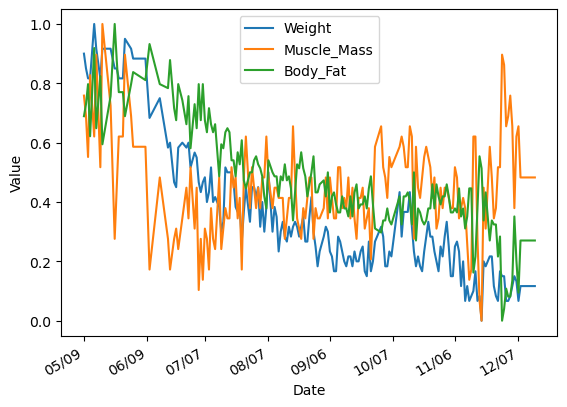

In [95]:


fig, ax = plt.subplots()
#inbody_df['Date'] = pd.to_datetime(inbody_df['Date'])
#inbody_df['Date'] = inbody_df['Date'].apply(lambda x: x.replace(year=2023))
x = inbody_df["Date"]

# 设置 x 轴主刻度为每周
ax.xaxis.set_major_locator(MonthLocator())

def scatter_by_label(df,col_x,col_y):
    plt.scatter(df[col_x],df[col_y],label=col_y)

def plot_by_label(df,col_x,col_y):
    plt.plot(df[col_x],df[col_y],label=col_y)

plot_by_label(normalize,'Date','Weight')
plot_by_label(normalize,'Date','Muscle_Mass')
plot_by_label(normalize,'Date','Body_Fat')
#plot_by_label('Body_Fat_Percentage')
#plot_by_label('BMI')
#plot_by_label('Visceral_Fat')

# 添加图例
ax.legend()

# 添加 x 轴和 y 轴标签
plt.xlabel("Date")
plt.ylabel("Value")

# 自动调整日期标签以防止重叠
fig.autofmt_xdate()

# 显示图形
plt.show()


In [79]:
train_df = pd.read_csv('Train.csv')
print("---")
print(train_df.head(30))

#內插資訊
train_df2 = train_df.interpolate(method='linear', axis=0)
train_df = train_df2
print("---")
print(train_df.head(30))

# 找到每一列的第一個非 NaN 值，並將 NaN 值填充為該值
train_df.fillna(train_df.ffill().bfill(), inplace=True)
print("---")
print(train_df.head(30))

train_df['Total_Volume'] = train_df[['Chest_Total_Volume', 'Back_Total_Volume', 'Legs_Total_Total']].sum(axis=1)


---
     Date  Squat_PR  Deadlift_PR  Sumo_PR  Bench_Press_PR  Pull_Up_PR  Chest_Total_Volume  Back_Total_Volume  Legs_Total_Total
0   05/01     127.0          NaN      NaN             NaN         NaN                 NaN                NaN            7400.0
1   05/02       NaN          NaN      NaN            72.0         NaN              6175.0                NaN               NaN
2   05/03       NaN          NaN      NaN             NaN        81.0                 NaN             6066.0               NaN
3   05/04       NaN          NaN      NaN             NaN         NaN                 NaN                NaN               NaN
4   05/05       NaN          NaN      NaN             NaN         NaN                 NaN                NaN               NaN
5   05/06     127.0          NaN      NaN             NaN         NaN                 NaN                NaN            7780.0
6   05/07       NaN          NaN      NaN            86.0         NaN              7250.0                Na

C:\Users\Tim\AppData\Local\Temp\ipykernel_8872\758546487.py:6: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  train_df2 = train_df.interpolate(method='linear', axis=0)


---
     Date    Squat_PR  Deadlift_PR     Sumo_PR  Bench_Press_PR  Pull_Up_PR  Chest_Total_Volume  Back_Total_Volume  Legs_Total_Total
0   05/01  127.000000          NaN         NaN             NaN         NaN                 NaN                NaN       7400.000000
1   05/02  127.000000          NaN         NaN            72.0         NaN         6175.000000                NaN       7476.000000
2   05/03  127.000000          NaN         NaN            74.8   81.000000         6390.000000        6066.000000       7552.000000
3   05/04  127.000000          NaN         NaN            77.6   81.300000         6605.000000        5832.000000       7628.000000
4   05/05  127.000000          NaN         NaN            80.4   81.600000         6820.000000        5598.000000       7704.000000
5   05/06  127.000000          NaN         NaN            83.2   81.900000         7035.000000        5364.000000       7780.000000
6   05/07  124.900000          NaN         NaN            86.0   82.2000

<bound method NDFrame.keys of       Date  Squat_PR  Deadlift_PR  Sumo_PR  Bench_Press_PR  Pull_Up_PR  Chest_Total_Volume  Back_Total_Volume  Legs_Total_Total  Total_Volume
0    05/01     127.0    74.000000     90.0            72.0        81.0              6175.0             6066.0            7400.0       19641.0
1    05/02     127.0    74.000000     90.0            72.0        81.0              6175.0             6066.0            7476.0       19717.0
2    05/03     127.0    74.000000     90.0            74.8        81.0              6390.0             6066.0            7552.0       20008.0
3    05/04     127.0    74.000000     90.0            77.6        81.3              6605.0             5832.0            7628.0       20065.0
4    05/05     127.0    74.000000     90.0            80.4        81.6              6820.0             5598.0            7704.0       20122.0
..     ...       ...          ...      ...             ...         ...                 ...                ...         

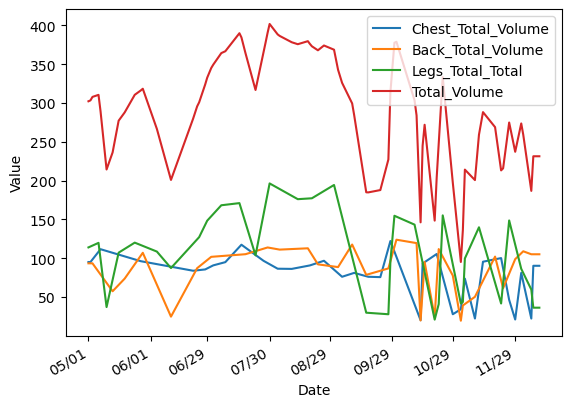

In [80]:
fig, ax = plt.subplots()
x = train_df["Date"]
print(train_df.keys)

normalize_train_df = train_df

for col in normalize_train_df.columns:
    if(col != 'Date'):  
        normalize_dataframe(normalize_train_df,col)

# normalize_dataframe(normalize_train_df,'Squat_PR')
# normalize_dataframe(normalize_train_df,'Deadlift_PR')
# normalize_dataframe(normalize_train_df,'Sumo_PR')
# normalize_dataframe(normalize_train_df,'Bench_Press_PR')
# normalize_dataframe(normalize_train_df,'Pull_Up_PR')
# normalize_dataframe(normalize_train_df,'Chest_Total_Volume')
# normalize_dataframe(normalize_train_df,'Back_Total_Volume')
# normalize_dataframe(normalize_train_df,'Legs_Total_Total')
# normalize_dataframe(normalize_train_df,'Total_Volume')

# 设置 x 轴主刻度为每周
ax.xaxis.set_major_locator(MonthLocator())



# plot_by_label(x,train_df,'Squat_PR')
# plot_by_label(x,train_df,'Deadlift_PR')
# plot_by_label(x,train_df,'Sumo_PR')
# plot_by_label(x,train_df,'Bench_Press_PR')
# plot_by_label(x,train_df,'Pull_Up_PR')
plot_by_label(x,train_df,'Chest_Total_Volume')
plot_by_label(x,train_df,'Back_Total_Volume')
plot_by_label(x,train_df,'Legs_Total_Total')
plot_by_label(x,train_df,'Total_Volume')

# 添加图例
ax.legend()

# 添加 x 轴和 y 轴标签
plt.xlabel("Date")
plt.ylabel("Value")

# 自动调整日期标签以防止重叠
fig.autofmt_xdate()

# 显示图形
plt.show()


In [81]:
#訓練體重要到達X公斤 需要多久 & 體脂肪 & 肌肉量 & PR 會是多少?
#訓練量 用2周為單位統計
#加上之前INBODY資料&訓練資料

# 创建 PairGrid，使用 'Date' 列来表示颜色
#g = sns.PairGrid(train_df,hue='Date')
#g.map(plt.scatter)



     Date    Weight  Muscle_Mass  Body_Fat  Body_Fat_Percentage       BMI  Visceral_Fat  Squat_PR  Deadlift_PR   Sumo_PR  Bench_Press_PR  Pull_Up_PR  Chest_Total_Volume  Back_Total_Volume  Legs_Total_Total  Total_Volume
8   05/09  1.033846     0.438462  0.247692             0.367692  0.389231      0.092308  1.856923     1.138462  1.384615        1.323077    1.273846          109.992308          71.723077         57.615385    239.330769
9   05/10  1.029231     0.435385  0.252308             0.376923  0.387692      0.092308  1.824615     1.138462  1.384615        1.323077    1.278462          109.219231          68.123077         36.923077    214.265385
10  05/11  1.026154     0.429231  0.260000             0.390769  0.386154      0.092308  1.792308     1.150000  1.384615        1.323077    1.283077          108.446154          64.523077         48.615385    221.584615
11  05/12  1.026154     0.441538  0.240000             0.360000  0.386154      0.092308  1.760000     1.161538  1.384615

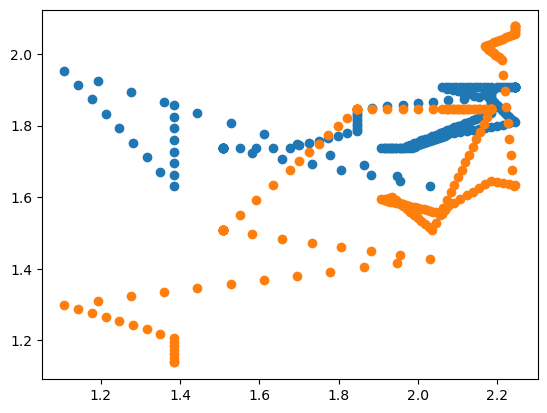

In [85]:
combine_df = pd.merge(inbody_df,train_df,on='Date',how='outer')
combine_df = combine_df.sort_values(by='Date').reset_index(drop=True)
combine_df = combine_df.iloc[8:]
print(combine_df.head(10))




scatter_by_label(combine_df,'Sumo_PR','Squat_PR')
scatter_by_label(combine_df,'Sumo_PR','Deadlift_PR')
#scatter_by_label(combine_df,'Sumo_PR','Bench_Press_PR')
#scatter_by_label(combine_df,'Sumo_PR','Pull_Up_PR')

#print(combine_df)
#g = sns.PairGrid(combine_df,vars=['Muscle_Mass','Squat_PR'])
#g.map(plt.scatter)

#g = sns.PairGrid(combine_df,vars=['Muscle_Mass','Deadlift_PR'])
#g.map(plt.scatter)

#g = sns.PairGrid(combine_df)
#g.map_offdiag(plt.scatter)
#g.map_diag(plt.hist)